<a href="https://colab.research.google.com/github/robcovino/IntroBiomolecularSimulations/blob/main/StochasticTimeSeries_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

# From Time series to probability distribution and thermodynamic equilibrium


Let's look at the following time series $x(t)$ that was pre-generated and you can just load for your analysis.

First, you can download the file at this link:

https://hessenbox-a10.rz.uni-frankfurt.de/getlink/fiBYiYwdxF8JxniTMqgLJj/time_series.csv


## Using Google Drive to store simulation data

Google Colab does not allow users to keep data on their computing nodes. However, we can use Google Drive to read, write, and store our simulations files. Therefore, we suggest to you to:

1. Create a folder in your own Google Drive and copy the necessary input files there.
2. Copy the path of your created directory. We will use it below.

In [2]:
#@title ## **Import Google Drive**
#@markdown Click in the "Run" buttom to make your Google Drive accessible.
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [3]:
#@title ## **Load data into a local numpy variable**

x = np.genfromtxt("drive/MyDrive/IntroBS/time_series.csv")

Q: What does the variable contain? What is the format of the data? How are the data organized? How many data points are there?

tip: use len(x) or x.shape

In [4]:
x



array([-1.        , -1.0173403 , -1.04124908, ..., -0.84661178,
       -0.7581781 , -0.75191702])

Let us now look at the dynamic process that is described by the time series. The easiest way is to plot the first K values. Assuming that the samples in the TS were saved with a frequency $\Delta t$, it means that considering the first K values corresponds to looking at the TS on a time interval $K \Delta t$.

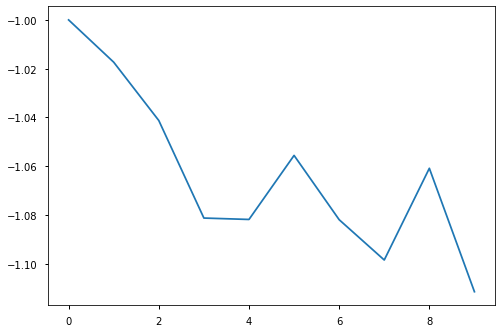

In [5]:
#@title ## **Plot first K values of the TS**

K = 10

plt.plot(x[:K])

Q: Inspect the TS at increasing values of K. 
1. What do you notice? 
2. What are the typical scales of the process? 
3. Can you discern any regularities? 
4. What quantities would you introduce to describe the process? 
5. What are the challenges you identify to describe the process? 
6. Can you ever make any general statement about the process? Or do you always need to see more data? 

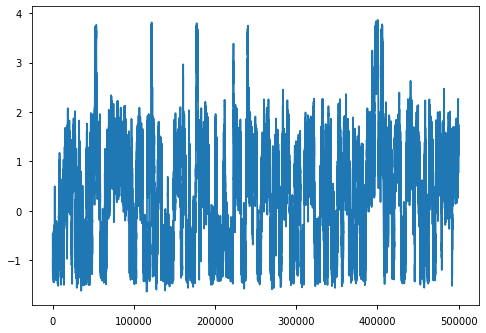

In [6]:
K = 500000

plt.plot(x[:K])

## **Calculating the average (mean) as a function of time**

Q: Write a function that plots the average of x as a function of t instead of x 
itself. The function should associate each K to the average of x up until index K.

Tip: a = np.zeros(N) makes an array of zeros long N, which you can use to store values in a for loop.

In [7]:
def mean_ts_1(x, K):
  values = np.zeros(K)
  for i in range(K):
    values[i] = x[:i+1].mean()
  return values

# alternative way of writing that is much much faster

def mean_ts_2(x, K):
  values = np.cumsum(x[:K])
  values /= range(1, K + 1)
  return values

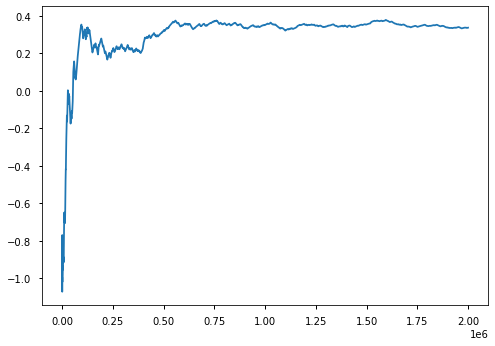

In [8]:
#plt.plot(mean_ts_1(x, 500000))
plt.plot(mean_ts_2(x, 2000000))

Q: How can you use this new tool to answer some of the questions of the previous point?

## Having access to sampling of different time scales

Q: Now repeat the same analysis you did before, assuming that all the data you got are y = x[:6000]. Repeat the analysis you performed so far. Would your general methodological conclusions change? Would you be able to make the same statement about the particular system?

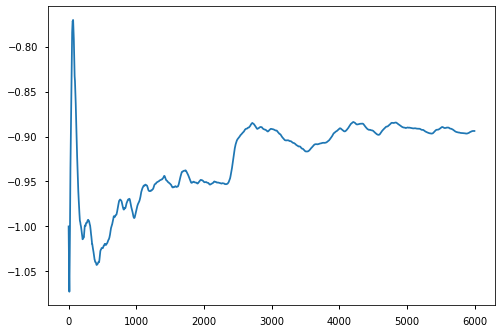

In [9]:
#plt.plot(x[:6000])
plt.plot(mean_ts_2(x, 6000))

## From time series to probability distributions

Let's continue considering the case where all the data we have are y = x[:6000]. We peformed the analysis above and are now convinced that our time series is *stationary* and want to make switch to a probabilistic description. 

The simplest way of doing that is to calculate a *histogram* from our time series. This corresponds to estimating probabilities as frequencies of a stationary process. It comprises the following steps:

1. Bin your variable, ie, coarse-grain your data into a discrete set of small intervals (bins or microstates). 
2. Count how often your time series is in a given bin.
3. Plot a bar for each bin. The height of the bin should be rescaled, such that the total area described the all bars is 1 (probability must be normalized). 

Q: Write a function that makes a histogram of y (Note: there are functions that do that for you, but it's good to write your own function to appreciate each steps).

In [10]:
def histogram_a(data, n_bins):
  

IndentationError: ignored

In [ ]:
# pyplot function
y = x[:6000]
plt.hist(y, bins=50)
plt.show()

Q: Now let's use the new histogram tool to investigate the preivous time series. What are the pros and cons of this new way of looking at our data?

Q: What statement can we make about the data contained in y?



In [ ]:
plt.hist(x[:3000000], bins=50, density=True)
plt.show()

Let's go back to the original data set x and investigate a histogram at increasing number of samples. 

Q: When are we actually allowed to interpret the histogram as an estimate of probabilities? 

Q: What guarantees us that x is actually y?

## Coarse-graining of our data

Now that you have a deep understanding of your data, you might agree that to make many of the statements and considerations that we discussed so far we do not need to take into account all details contained in x, ie, we do not need to look at the data with the highest resolution. We can coarse-grain the data, ie, look at the data with lower resolution, and get out the same sort of understanding.

Q: How would you coarse-grain your data and why? Can you identify some (macro)states?

Q: Use the plt.hist function to plot a histogram of your coarse grained data. Tip: Use a custom version of bins.

In [ ]:
print(x.min())
print(x.max())



In [ ]:
c_i, _, _ = plt.hist(x, bins=[-1.7,-0.2, 2.5, 3.95])
plt.show()

In [ ]:
c_i / len(x)

Q: Use the previous tools to write a function that calculates the relative probability of 2 states. When does this number not depend on time any more? What must the underlying time series look like for this condition to be satisfied?

In [ ]:
def relative_weights(data, bins):
  c_i, _, _ = plt.hist(data, bins=bins)
  return c_i / len(data)


In [ ]:
relative_weights(x[:500000],bins=[-1.7,-0.2, 2.5] )

In [ ]:
ratio = np.zeros(100)
bins=[-1.7,-0.2, 2.5]
data = x[:500000]
for idx, k in enumerate(np.logspace(3, 7, 100)):
  c_i, _, _ = plt.hist(x[:int(k)], bins=bins)
  ratio[idx] = c_i[0] / c_i[1]

In [ ]:
plt.plot(ratio)

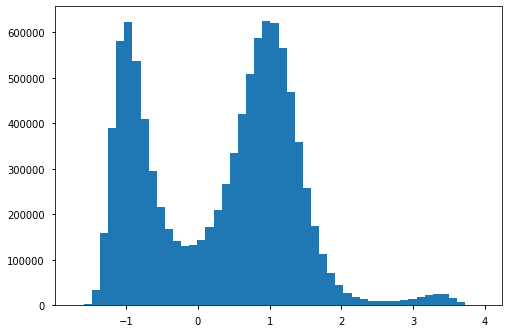

In [16]:
c, b, _ = plt.hist(x, bins=50)

In [15]:
p = c /c.sum()
print(p)

[1.16999988e-05 3.29799967e-04 3.43169966e-03 1.59857984e-02
 3.88865961e-02 5.81735942e-02 6.23415938e-02 5.37384946e-02
 4.08592959e-02 2.94449971e-02 2.15966978e-02 1.67109983e-02
 1.40806986e-02 1.29907987e-02 1.31596987e-02 1.44027986e-02
 1.71954983e-02 2.09961979e-02 2.67209973e-02 3.35771966e-02
 4.19994958e-02 5.09181949e-02 5.87685941e-02 6.26007937e-02
 6.21504938e-02 5.65470943e-02 4.68893953e-02 3.58543964e-02
 2.57543974e-02 1.74006983e-02 1.13561989e-02 7.09619929e-03
 4.40389956e-03 2.76129972e-03 1.84519982e-03 1.27529987e-03
 1.02219990e-03 8.75099912e-04 8.56899914e-04 8.67299913e-04
 1.08459989e-03 1.38329986e-03 1.84339982e-03 2.31449977e-03
 2.56159974e-03 2.43939976e-03 1.67029983e-03 6.83399932e-04
 1.31399987e-04 9.79999902e-06]


In [19]:
xm = np.zeros(50)
for idx, el in enumerate(b):
  xm[idx] = (b[idx + 1] - b[idx])

0 -1.7007175207847478
1 -1.587708133261519
2 -1.4746987457382903
3 -1.3616893582150613
4 -1.2486799706918328
5 -1.1356705831686038
6 -1.022661195645375
7 -0.9096518081221463
8 -0.7966424205989175
9 -0.6836330330756888
10 -0.57062364555246
11 -0.4576142580292313
12 -0.3446048705060023
13 -0.23159548298277355
14 -0.1185860954595448
15 -0.005576707936316039
16 0.10743267958691272
17 0.22044206711014147
18 0.3334514546333702
19 0.4464608421565992
20 0.5594702296798277
21 0.6724796172030567
22 0.7854890047262852
23 0.8984983922495142
24 1.0115077797727432
25 1.1245171672959717
26 1.2375265548192007
27 1.3505359423424292
28 1.4635453298656582
29 1.5765547173888868
30 1.6895641049121157
31 1.8025734924353443
32 1.9155828799585732
33 2.028592267481802
34 2.1416016550050307
35 2.2546110425282597
36 2.3676204300514883
37 2.480629817574717
38 2.593639205097946
39 2.7066485926211747
40 2.8196579801444033
41 2.9326673676676327
42 3.0456767551908612
43 3.1586861427140898
44 3.2716955302373183
45 3.3

## Time average, ensemble averages, and ergodicity

So far we took averages in time. But now you have calculated probabilities associated to the dynamical process, and when we have probabilities, we calculate averages in a very different way, called ensemble average:

$<x> = ∑_ip_i x_i$

Q: Introduce discrete states $x_i$ (eg bins), estimate the associated probabilities $p_i$, and show that the average in time and the ensemble averages are the same.

In [ ]:
# time average

x_t = x.mean()

# ensemble average

c, bins, _ = plt.hist(x, bins=50)

bin_midpoint = (bins[1:] - bins[ :-1 ])/2 + bins[:-1] 
x_e = np.sum(bin_midpoint * c / c.sum()) 

In [ ]:
(bins[1:] - bins[ :-1 ])/2 + bins[:-1] 